In [1]:
# Importing Libraries
import pandas as pd 
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset("Lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

#Data Cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'], errors='coerce')

c:\Users\User\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
df_US_software_pivot = pd.read_csv('https://lukeb.co/software_csv', index_col='job_posted_month')
df_US_software_pivot

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


In [11]:
df_US_pivot = df_US.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')

In [13]:
df_US_merged = df_US_pivot.merge(df_US_software_pivot, on='job_posted_month')

In [16]:
top_5 = df_US_merged.sum().sort_values(ascending=False).head().index.tolist()

top_5

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'Data Analyst',
 'Data Scientist']

<Axes: xlabel='job_posted_month'>

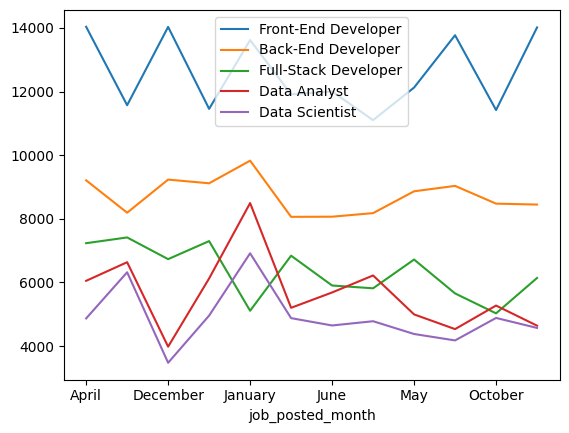

In [17]:
df_US_merged[top_5].plot(kind = 'line')

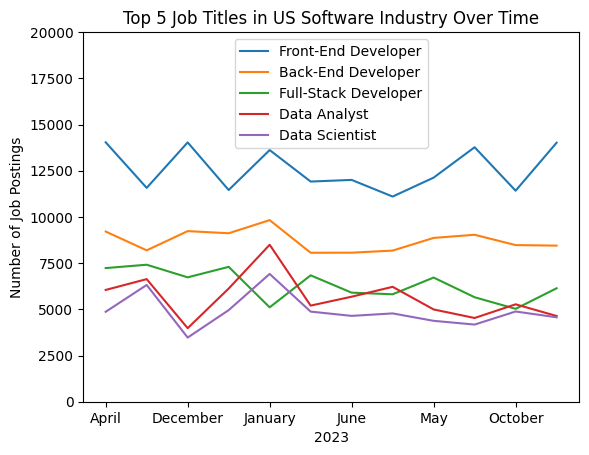

In [19]:
df_US_merged[top_5].plot(kind= 'line')
plt.title('Top 5 Job Titles in US Software Industry Over Time')
plt.xlabel('2023')
plt.ylabel('Number of Job Postings')
plt.ylim(0, 20000)
plt.legend()
plt.show()